In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

In [130]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [131]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [132]:
car[['CarName','company','model']].sample(4)

,CarName,company,model
131,renault 5 gtl,renault,5 gtl
127,porsche cayenne,porsche,cayenne
83,mitsubishi g4,mitsubishi,g4
38,honda civic 1300,honda,civic 1300


In [133]:
# drop CarName column now
car.drop(labels='CarName',axis=1, inplace=True)

In [134]:
# check if there are any null values
null_values =car.isnull().sum() 
null_values[null_values.values > 0]

model    2
dtype: int64

In [135]:
car[car.model.isnull()==True]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
138,139,2,gas,std,two,hatchback,fwd,front,93.70,156.90,63.40,53.70,2050,ohcf,four,97,2bbl,3.62,2.36,9.00,69,4900,31,36,5118.00,subaru,NaN
141,142,0,gas,std,four,sedan,fwd,front,97.20,172.00,65.40,52.50,2145,ohcf,four,108,2bbl,3.62,2.64,9.50,82,4800,32,37,7126.00,subaru,NaN


In [136]:
numeric_data = car.select_dtypes(include=['number'])

In [137]:
numeric_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00


In [138]:
print('unique doornumber',car.doornumber.unique())
print('unique cylindernumber',car.cylindernumber.unique())

# there are two columns in the dataset where words such as "two","four" etc are used to represent numeric values.
# we can replace those strings with corresponding numeric value.

car['doornumber'] = car['doornumber'].map({"two": 2,"four": 4})
car['cylindernumber'] = car['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8 })

unique doornumber ['two' 'four']
unique cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [139]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype            2
aspiration          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
fuelsystem          8
company            28
model             141
dtype: int64

In [140]:
print('fueltype:',categorical_cols.fueltype.unique())
print('aspiration:',categorical_cols.aspiration.unique())
print('enginelocation:',categorical_cols.enginelocation.unique())

# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
enginelocation: ['front' 'rear']


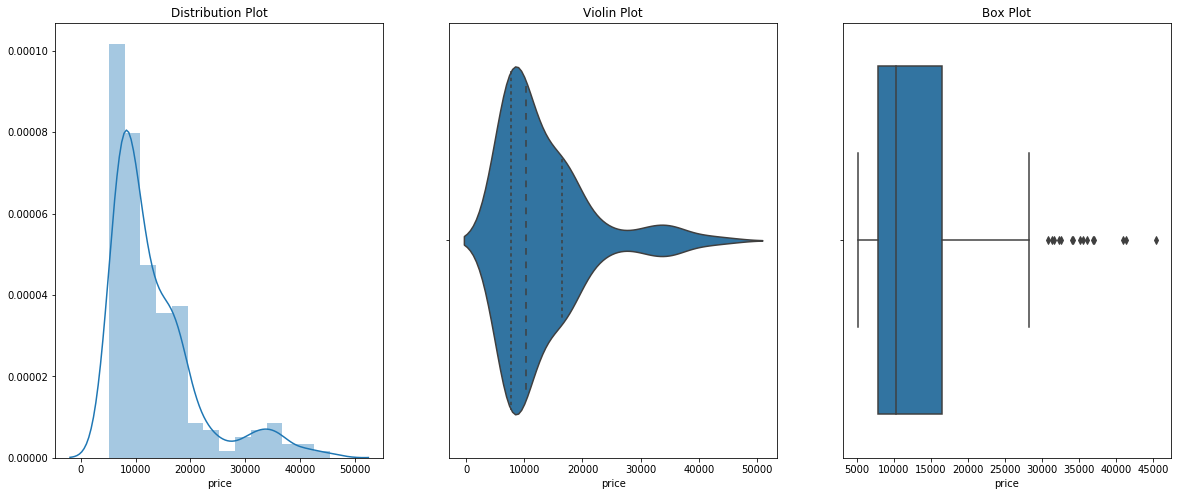

In [141]:
# car Price Distribution
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
#sns.boxplot(car['price'])

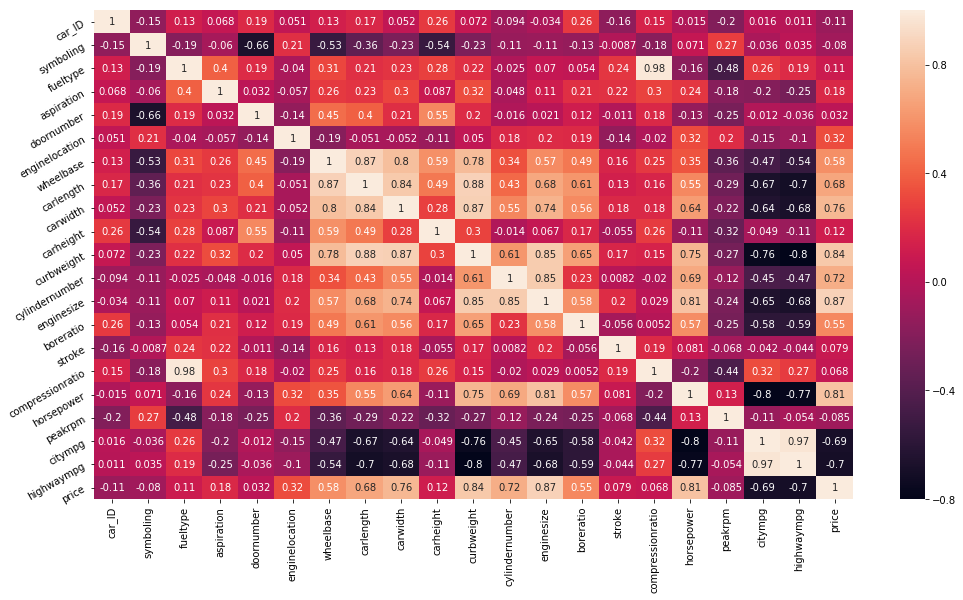

In [142]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### Insights:
1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with car length & car width.
3. Wheel base is highly correlated with car length & car width.

In [143]:
#car.select_dtypes(exclude=['number']).head()
# Alternatively we can use the below statement as well to get the categorical columns
#car.select_dtypes(include=['object']).head()

In [144]:
car.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
18,19,2,0,0,2,hatchback,fwd,0,88.40,141.10,60.30,53.20,1488,l,3,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.00,chevrolet,impala
19,20,1,0,0,2,hatchback,fwd,0,94.50,155.90,63.60,52.00,1874,ohc,4,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.00,chevrolet,monte carlo
146,147,0,0,0,4,wagon,fwd,0,97.00,173.50,65.40,53.00,2290,ohcf,4,108,2bbl,3.62,2.64,9.00,82,4800,28,32,7463.00,subaru,trezia
16,17,0,0,0,2,sedan,rwd,0,103.50,193.80,67.90,53.70,3380,ohc,6,209,mpfi,3.62,3.39,8.00,182,5400,16,22,41315.00,bmw,x5
178,179,3,0,0,2,hatchback,rwd,0,102.90,183.50,67.70,52.00,2976,dohc,6,171,mpfi,3.27,3.35,9.30,161,5200,20,24,16558.00,toyota,corolla liftback


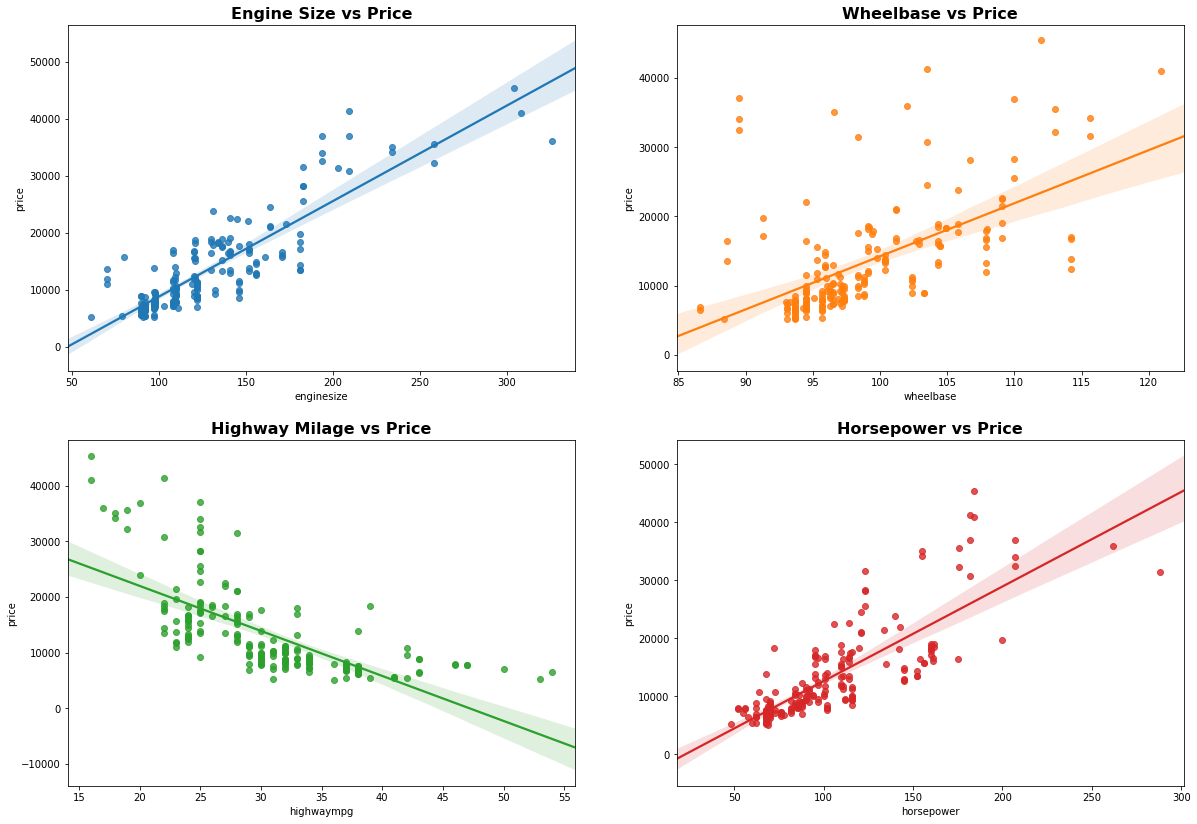

In [159]:
fig, ax=plt.subplots(nrows =2,ncols=2,figsize=(20,14))
ax[0][0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0][0])
ax[0][1].set_title("Wheelbase vs Price",fontsize=16,weight="bold")
sns.regplot(x='wheelbase',y='price', data =car,ax=ax[0][1])
ax[1][0].set_title('Highway Milage vs Price',fontsize=16,weight="bold")
sns.regplot(x='highwaympg',y='price', data =car,ax=ax[1][0])
ax[1][1].set_title("Horsepower vs Price",fontsize=16,weight="bold")
sns.regplot(x='horsepower',y='price', data =car,ax=ax[1][1])
plt.show()

### Bivariate Analysis

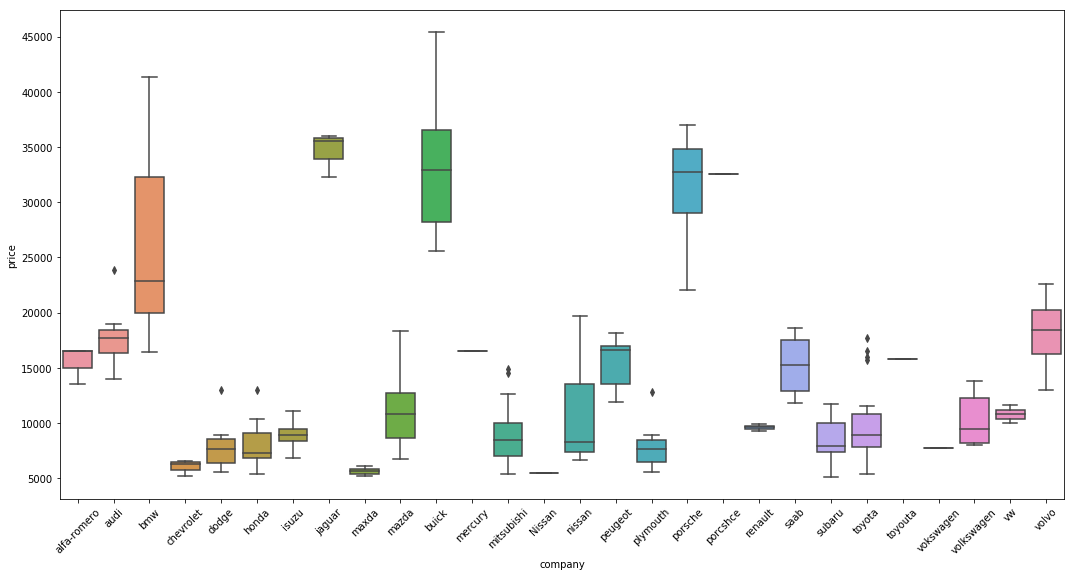

In [128]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)